<a href="https://colab.research.google.com/github/IsaacSuarezM/Proyecto-Aprendizaje-Automatico/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

In [3]:
import yfinance as yf
import pandas as pd

# Definimos el ticker
ticker = "^GSPC"

# Descargamos datos (ej. últimos 5 años con intervalo diario)
data = yf.download(ticker, start="2019-01-01", end="2026-01-01", interval="1d")

# Limpieza rápida
data.reset_index(inplace=True)

# Mostrar las primeras filas
print(f"Datos de {ticker} cargados:")
data.head()

/tmp/ipython-input-3191455727.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2019-01-01", end="2026-01-01", interval="1d")
[*********************100%***********************]  1 of 1 completed

Datos de ^GSPC cargados:


Price,Date,Close,High,Low,Open,Volume
Ticker,,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
0,2019-01-02,2510.030029,2519.489990,2467.469971,2476.959961,3733160000
1,2019-01-03,2447.889893,2493.139893,2443.959961,2491.919922,3858830000
2,2019-01-04,2531.939941,2538.070068,2474.330078,2474.330078,4234140000
3,2019-01-07,2549.689941,2566.159912,2524.560059,2535.610107,4133120000
4,2019-01-08,2574.409912,2579.820068,2547.560059,2568.110107,4120060000


# Task
Realiza un Análisis Exploratorio de Datos (EDA) sobre los datos bursátiles del S&P 500 (^GSPC) proporcionados, con el fin de comprender sus características clave, tendencias y distribuciones

## Data Overview

### Subtask:

Instrucciones de Inspección de Datos
Obtén información básica sobre el conjunto de datos, incluyendo los tipos de datos, valores no nulos y estadísticas descriptivas utilizando las funciones `info()` y `describe()`. Verifica si existen valores faltantes utilizando `isnull().sum()`


In [4]:
print("DataFrame Info:")
data.info()

print("\nEstadística descriptiva:")
data.describe()

print("\nValores Nulos por Columna:")
data.isnull().sum()

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1760 entries, 0 to 1759
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   (Date, )         1760 non-null   datetime64[ns]
 1   (Close, ^GSPC)   1760 non-null   float64       
 2   (High, ^GSPC)    1760 non-null   float64       
 3   (Low, ^GSPC)     1760 non-null   float64       
 4   (Open, ^GSPC)    1760 non-null   float64       
 5   (Volume, ^GSPC)  1760 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 82.6 KB

Estadística descriptiva:

Valores Nulos por Columna:


,,0
Price,Ticker,
Date,,0
Close,^GSPC,0
High,^GSPC,0
Low,^GSPC,0
Open,^GSPC,0
Volume,^GSPC,0


## Visualizando precio de cierre

### Subtask:
Grafica el precio de cierre ('Close') a lo largo del tiempo para observar tendencias y patrones. Asegúrate de que el eje x represente la fecha ('Date') y el eje y represente el precio de cierre ('Close').


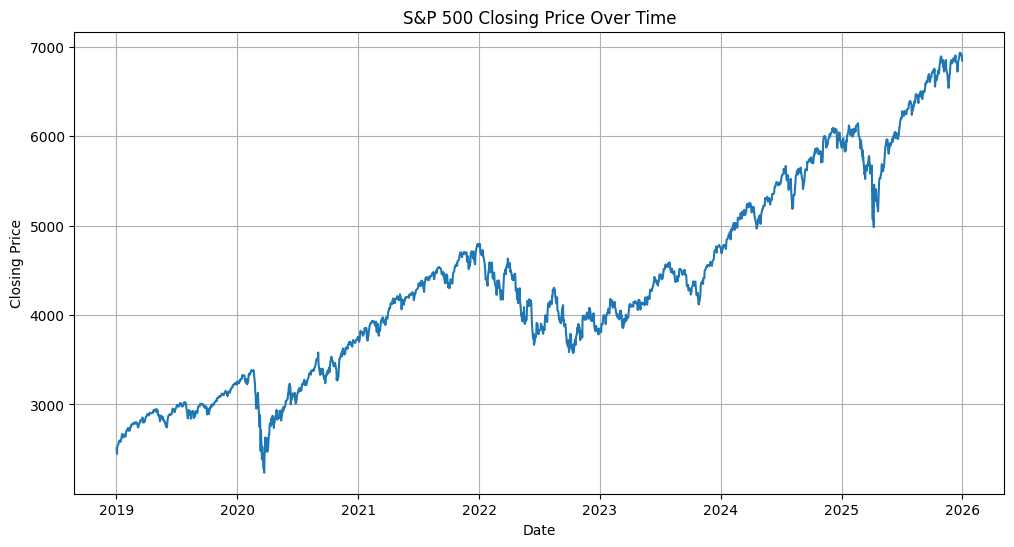

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(data[('Date', '')], data[('Close', '^GSPC')])
plt.title('S&P 500 Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.grid(True)
plt.show()

## Visualizando Volume Diario

Grafica el 'Volume' (volumen de transacciones) a lo largo del tiempo para comprender la actividad de negociación del mercado. Asegúrate de que el eje x represente la fecha ('Date') y el eje y represente el volumen ('Volume').


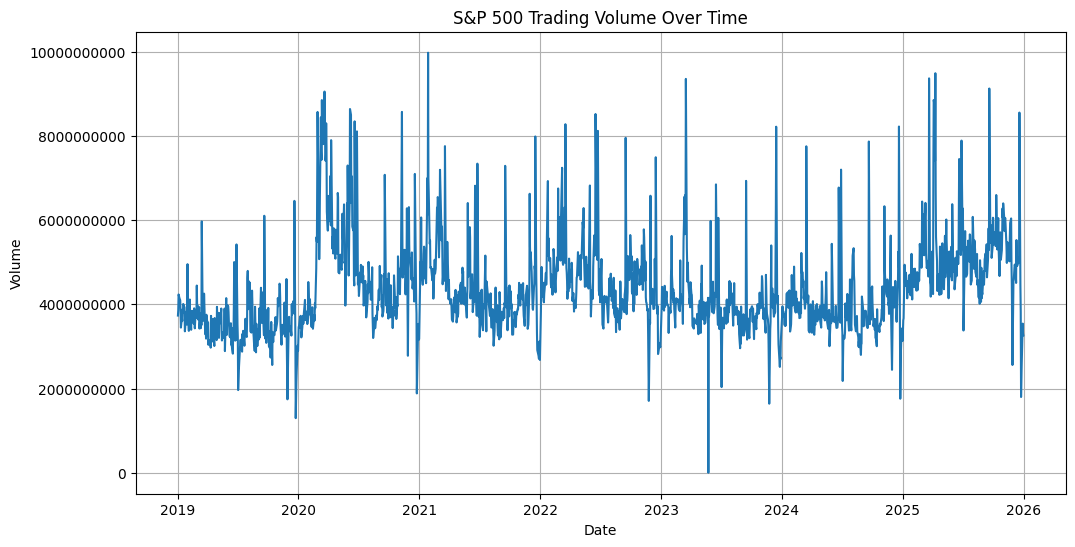

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(data[('Date', '')], data[('Volume', '^GSPC')])
plt.title('S&P 500 Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
#cambia la notacion cientifica de ylabel y agregale comas y resumelo en millones
plt.ticklabel_format(style='plain', axis='y')



plt.grid(True)
plt.show()

## Calcula y Visualiza Rendimiento Diarios


Calcular los rendimientos diarios del precio de cierre y visualizar su distribución mediante un histograma. Además, visualiza los rendimientos diarios a lo largo del tiempo con un gráfico de líneas.

Daily Returns Descriptive Statistics:
count    1759.000000
mean        0.000650
std         0.012560
min        -0.119841
25%        -0.004436
50%         0.000980
75%         0.006730
max         0.095154
Name: Daily_Return, dtype: float64


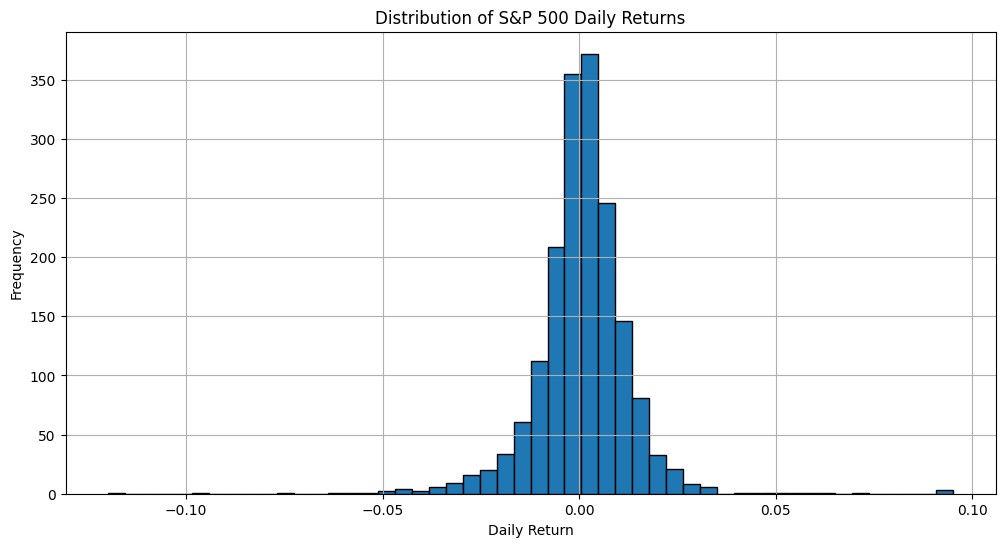

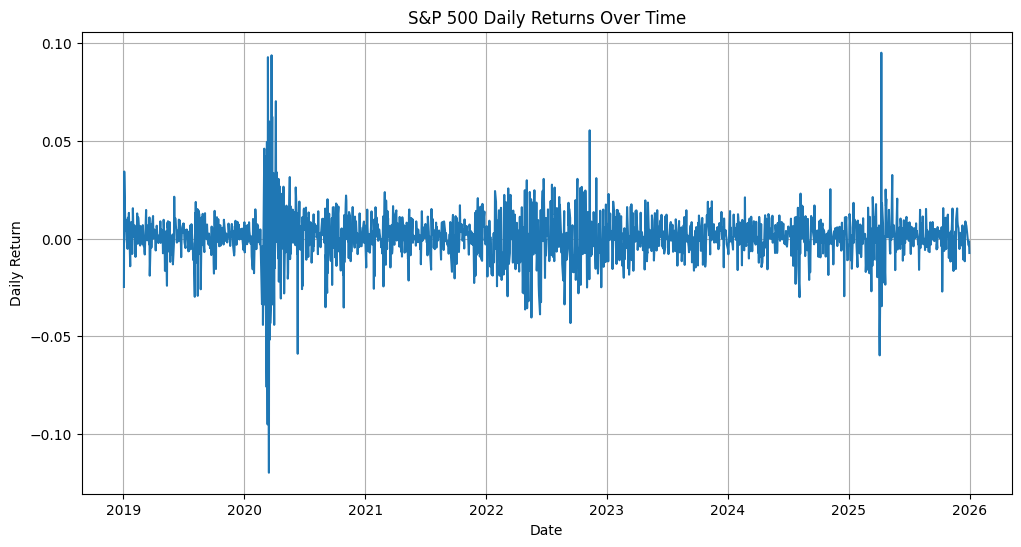

In [7]:
data['Daily_Return'] = data[('Close', '^GSPC')].pct_change()

print("Daily Returns Descriptive Statistics:")
print(data['Daily_Return'].describe())

plt.figure(figsize=(12, 6))
plt.hist(data['Daily_Return'].dropna(), bins=50, edgecolor='black')
plt.title('Distribution of S&P 500 Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(data[('Date', '')], data['Daily_Return'])
plt.title('S&P 500 Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()

## Resumen:

### Hallazgos Clave del Análisis de Datos

* El conjunto de datos contiene 1760 entradas y 6 columnas, que cubren los datos bursátiles del S&P 500, incluyendo Fecha (**Date**), Apertura (**Open**), Máximo (**High**), Mínimo (**Low**), precio de Cierre (**Close**) y Volumen (**Volume**).
* Todas las columnas tienen 1760 valores no nulos, lo que indica un conjunto de datos completo sin registros faltantes.
* La columna `Date` es de tipo `datetime64[ns]`, las columnas relacionadas con los precios son `float64` y el `Volume` es `int64`.
* El precio de cierre (**'Close'**) del S&P 500 muestra una tendencia alcista general durante el periodo observado, lo que indica un crecimiento global del mercado, aunque con fluctuaciones visibles.
* El volumen de negociación (**'Volume'**) exhibe fluctuaciones significativas a lo largo del tiempo, lo que sugiere periodos de actividad de mercado variable, potencialmente vinculados a eventos específicos del mercado o noticias.
* Los rendimientos diarios calculados para el S&P 500 tienen una media de aproximadamente **0.00065**, lo que indica un ligero rendimiento diario promedio positivo.
* La desviación estándar de los rendimientos diarios es de **0.01256**, lo que sugiere un nivel moderado de volatilidad diaria en los precios.
* El rendimiento diario mínimo observado fue de **-0.0903** y el máximo de **0.0938**, resaltando movimientos de precios diarios significativos en ambas direcciones.
* La distribución de los rendimientos diarios, como se muestra en el histograma, está centrada en cero y parece tener "colas más pesadas" (*fat tails*) que una distribución normal, algo común en los rendimientos financieros.


### Próximos Pasos

* La presencia de clústeres de volatilidad en los rendimientos diarios sugiere un potencial para realizar análisis adicionales utilizando modelos como **GARCH** para comprender y pronosticar mejor el riesgo de mercado.
* Investigar los periodos de volumen inusualmente alto y rendimientos diarios extremos podría revelar correlaciones con eventos económicos específicos o noticias empresariales que impactaron al S&P 500.
* Integrar al analisis series de interes que puedan relacionarse como commodities, cotizaciones de empresas importantes, otros activos alternativos.

### Scope probables a modelar:
* Portafolio de inversión
* Valor al Riesgo
* Precio de un activo o multiples activos  